In [3]:
#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [4]:
#read mnist fashion dataset
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Shape of x_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


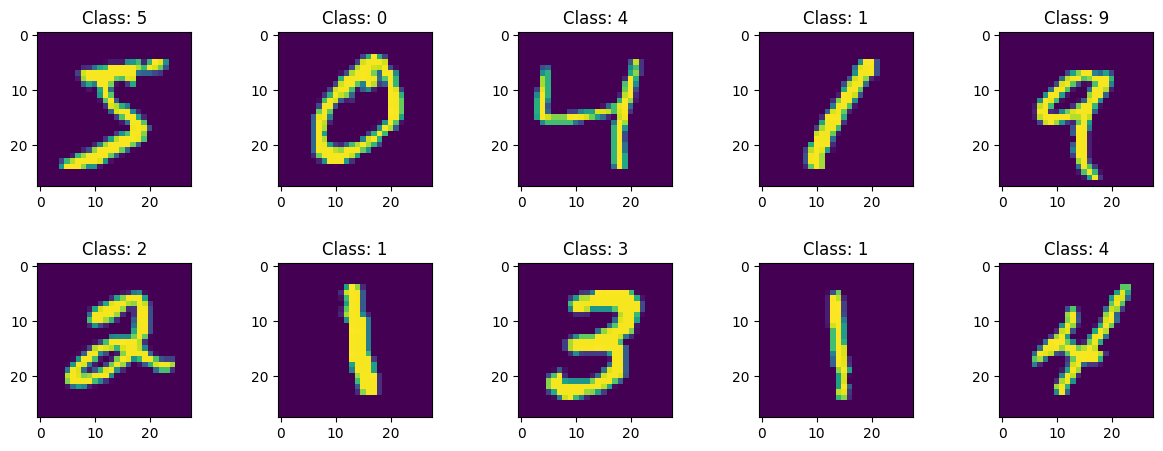

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [7]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2023-02-08 16:47:41.246229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#fit training dataset into the model
classifier_e25_fit = classifier_e25.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2539 - accuracy: 0.9279
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1013 - accuracy: 0.9700
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9799
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0481 - accuracy: 0.9849
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0272 - accuracy: 0.9915
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 8/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 9/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 10/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.011

In [7]:
#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)
#calculate evaluation parameters
f1_e25 = f1_score(y_test, classifier_e25.predict_classes(X_test), average='micro')
roc_e25 = roc_auc_score(y_test, classifier_e25.predict_proba(X_test), multi_class='ovo')
#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                      'F1 score'      : round(f1_e25,3),
                      'ROC AUC score' : round(roc_e25,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])
#print evaluation dataframe
display(stats_e25)

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.28,0.893,0.991,0.39
